In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
df = pd.read_csv('data_science_job.csv')

In [61]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [62]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [63]:
df.shape

(19158, 13)

In [64]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [65]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9690,0.920,no_enrollment,Graduate,3.0,82.0
7967,0.926,Part time course,Graduate,9.0,77.0
10852,0.767,no_enrollment,Graduate,20.0,48.0
2716,0.698,Part time course,Masters,7.0,56.0
15237,0.920,no_enrollment,Graduate,14.0,60.0


In [66]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [67]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

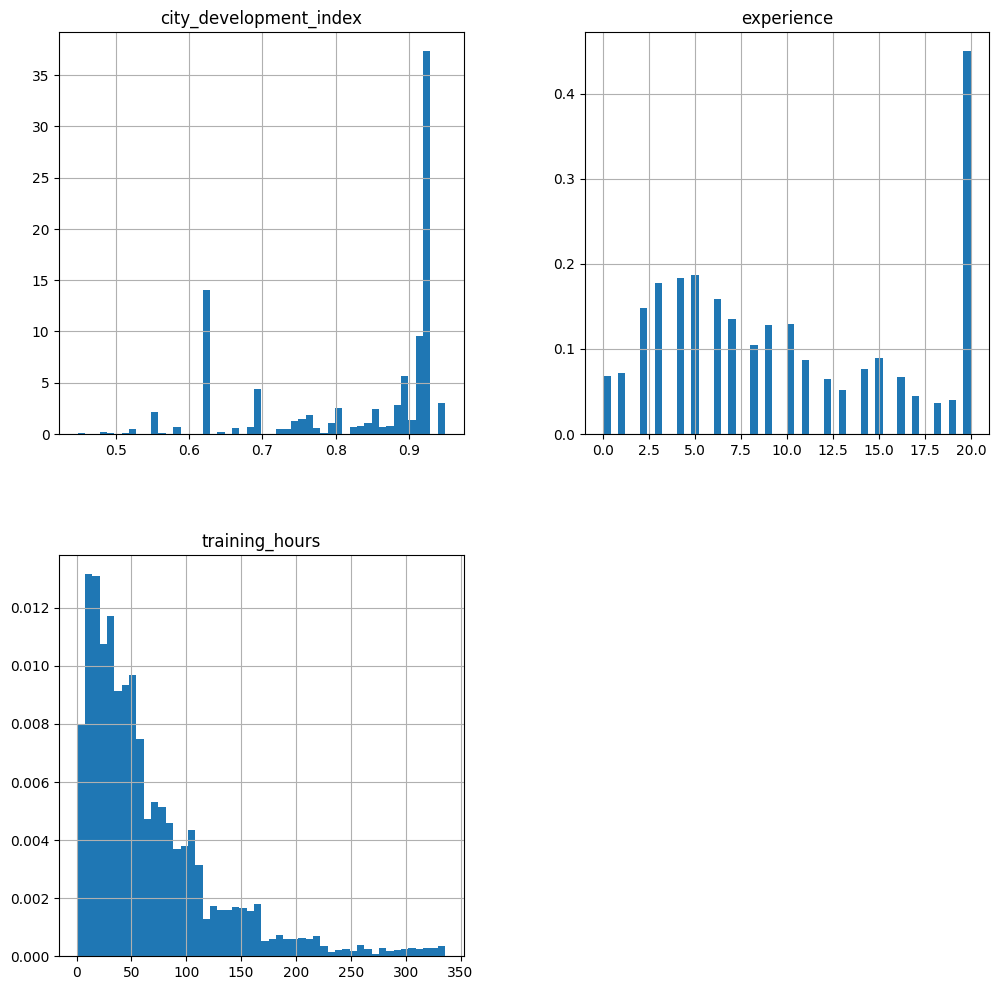

In [68]:
df[cols].hist(bins=50, density=True, figsize=(12, 12))
plt.show()

In [69]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

<AxesSubplot:>

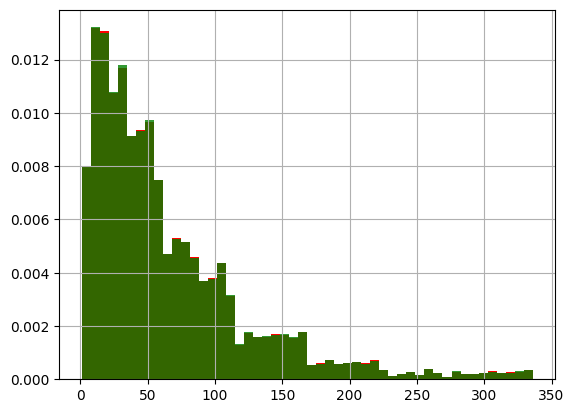

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

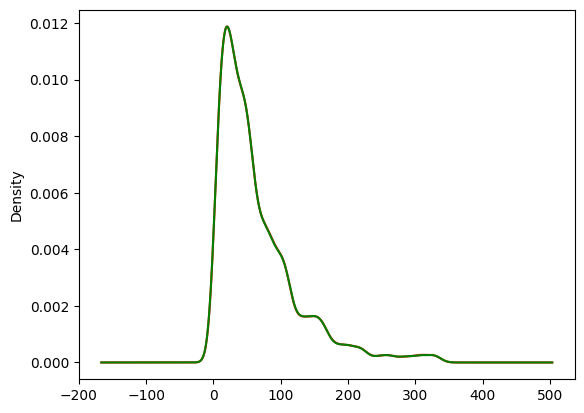

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

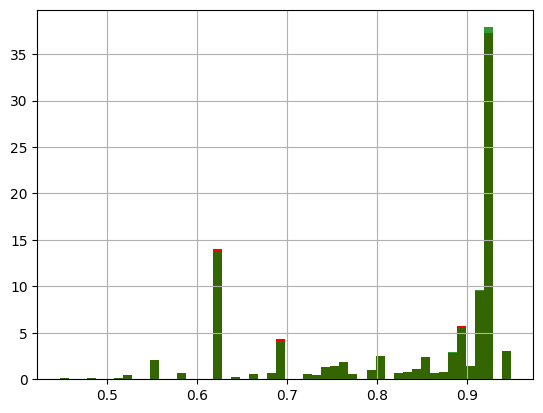

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

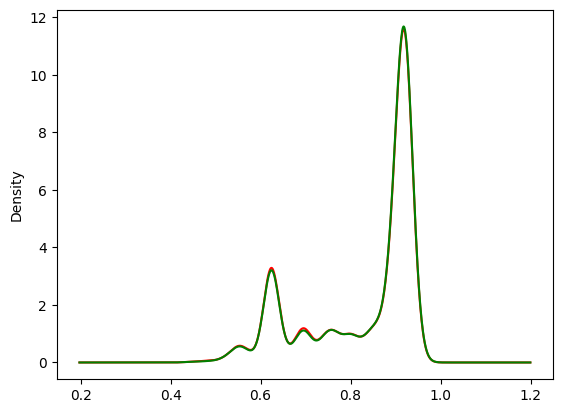

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

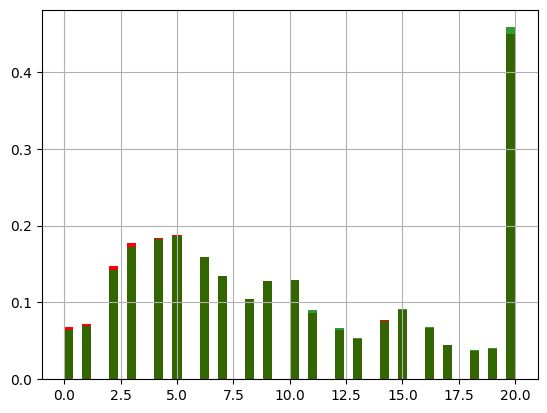

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

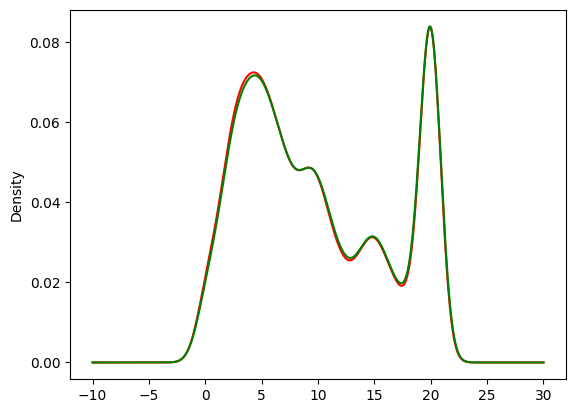

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [76]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [77]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [78]:
new_df['target'] = df['target']
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours,target
0,0.920,no_enrollment,Graduate,20.0,36.0,1.0
1,0.776,no_enrollment,Graduate,15.0,47.0,0.0
2,0.624,Full time course,Graduate,5.0,83.0,0.0
4,0.767,no_enrollment,Masters,20.0,8.0,0.0
5,0.764,Part time course,Graduate,11.0,24.0,1.0
...,...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0,1.0
19154,0.920,no_enrollment,Graduate,14.0,52.0,1.0
19155,0.920,no_enrollment,Graduate,20.0,44.0,0.0
19156,0.802,no_enrollment,High School,0.0,97.0,0.0


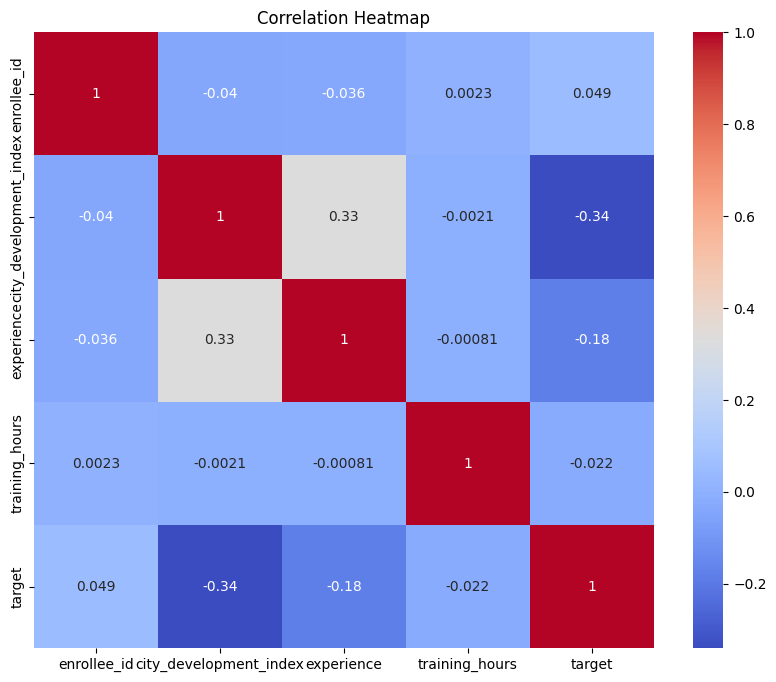

In [79]:
# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

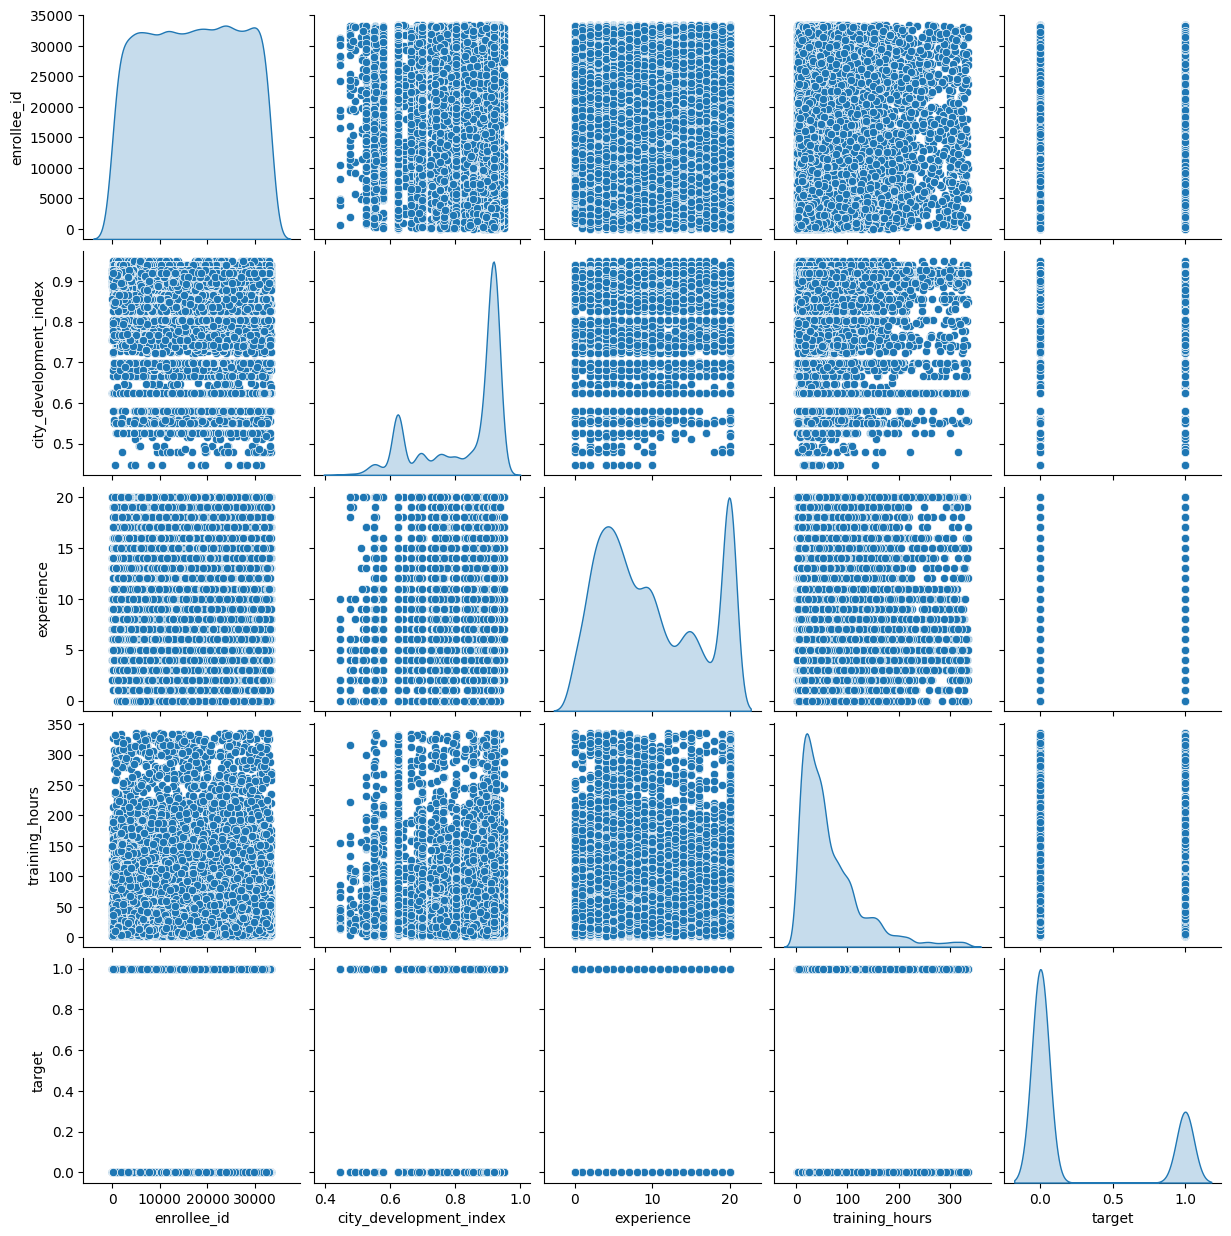

In [80]:
# Pairplot to visualize relationships between numeric variables
sns.pairplot(df, diag_kind='kde')
plt.show()

In [83]:
le = LabelEncoder()
new_df['enrolled_university'] = le.fit_transform(new_df['enrolled_university'])
new_df['education_level'] = le.fit_transform(new_df['education_level'])
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours,target
0,0.920,2,0,20.0,36.0,1.0
1,0.776,2,0,15.0,47.0,0.0
2,0.624,0,0,5.0,83.0,0.0
4,0.767,2,2,20.0,8.0,0.0
5,0.764,1,0,11.0,24.0,1.0
...,...,...,...,...,...,...
19153,0.878,2,0,14.0,42.0,1.0
19154,0.920,2,0,14.0,52.0,1.0
19155,0.920,2,0,20.0,44.0,0.0
19156,0.802,2,1,0.0,97.0,0.0


In [84]:
X = new_df.drop(columns=['target'])
y = new_df['target']

In [85]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((13745, 5), (3437, 5))

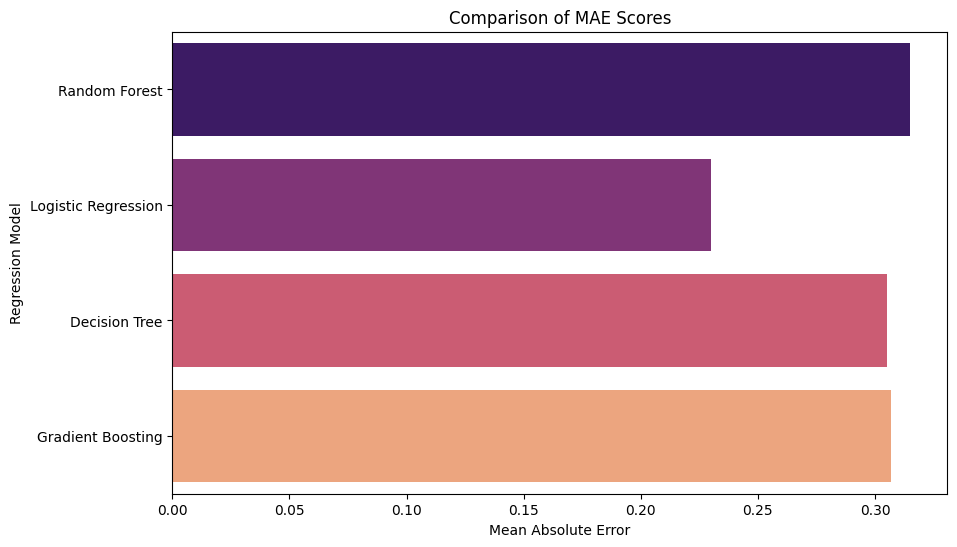

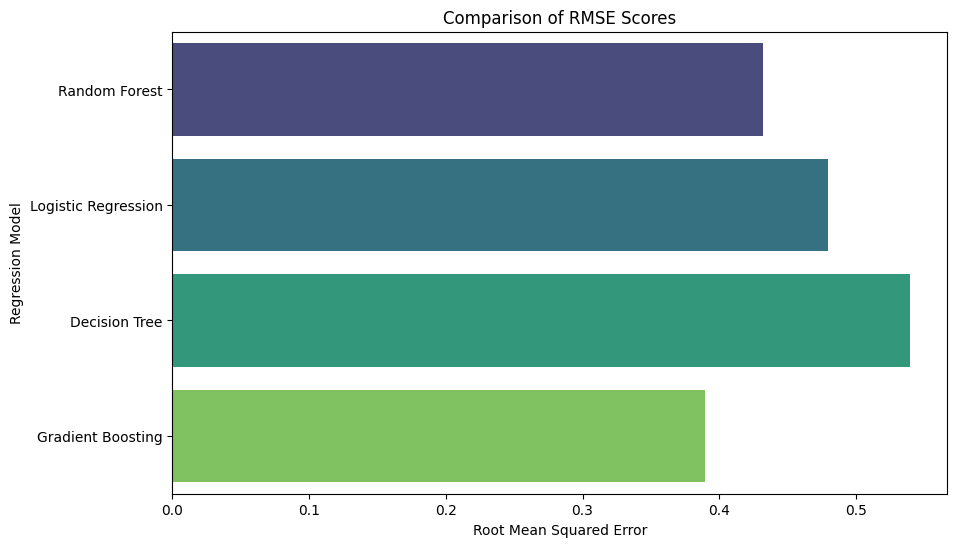

In [86]:
# Initialize regression models
models = {
    'Random Forest': RandomForestRegressor(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Initialize lists to store evaluation metrics
model_names = []
mae_scores = []
rmse_scores = []

# Train and Evaluate Regression Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_names.append(model_name)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Create bar plots for MAE scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mae_scores, y=model_names, palette='magma')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Regression Model')
plt.title('Comparison of MAE Scores')
plt.show()

# Create bar plots for RMSE scores
plt.figure(figsize=(10, 6))
sns.barplot(x=rmse_scores, y=model_names, palette='viridis')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Regression Model')
plt.title('Comparison of RMSE Scores')
plt.show()